In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import random

In [52]:
train = pd.read_csv(r"C:\Users\User\Downloads\Week-4-Project\Week-4-Project\fashion-mnist_train.csv")
test = pd.read_csv(r"C:\Users\User\Downloads\Week-4-Project\Week-4-Project\fashion-mnist_test.csv")

Data formatting

In [3]:
train.shape

(60000, 785)

In [53]:
test.shape

(10000, 785)

In [5]:
train = np.array(train)
m, n = train.shape
np.random.shuffle(train) # shuffle before splitting into dev and training sets



In [39]:
train.shape

(60000, 785)

In [54]:
test = np.array(test)
mt, nt = test.shape

In [55]:
test.shape


(10000, 785)

In [6]:
dev = train[0:1000].T
Y_dev = dev[0]
X_dev = dev[1:n]
X_dev = X_dev / 255.

train = train[1000:m].T
Y_train = train[0]
X_train = train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [56]:
test = test.T
Y_test = test[0]
X_test = test[1:mt]


In [45]:
train.shape

(60000, 785)

In [8]:
dev.shape

(785, 1000)

In [13]:
X_train[:, 0].shape
#Hence, one column has 784 rows, which means each column corrosponds to one example.

(784,)

Building Model

In [15]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
#Initialising weights and biases randomly

def ReLU(Z):
    return np.maximum(Z, 0)
#Activation function relu: returns positive value for positive input, otherwise 0
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    #For standardising values between 0 and 1 
def ReLU_deriv(Z):
    return Z > 0
    #For backprop, it sorts of "undoes" the activation function during back propogation

In [62]:
def forward_prop(W1, b1, W2, b2, X): #Z = WA + B
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y): #It converts data categorically to ensure better predictions. It works like a Truth table of 0s and 1s. In our case, it is used to determine errors.
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): #Measurement of errors Z, error due to W and B so Weights and biases can be adjusted accordingly.
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y #Onehot will tell backprop if prediction was right or not and measure the error accordingly. 
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [63]:

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): #Updating Params in accordance with error and hyperparameter alpha (learning rate).
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations): #The final Model with everything together.
    W1, b1, W2, b2 = init_params() #Initialise weights and biases
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [21]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1250)

Iteration:  0
[9 3 3 ... 4 3 4] [5 9 6 ... 9 4 7]
0.10628813559322034
Iteration:  10
[9 9 9 ... 9 2 7] [5 9 6 ... 9 4 7]
0.2734915254237288
Iteration:  20
[9 9 6 ... 9 2 7] [5 9 6 ... 9 4 7]
0.38820338983050845
Iteration:  30
[8 9 6 ... 9 6 7] [5 9 6 ... 9 4 7]
0.4942542372881356
Iteration:  40
[8 9 6 ... 9 4 7] [5 9 6 ... 9 4 7]
0.5662203389830508
Iteration:  50
[8 9 6 ... 9 4 7] [5 9 6 ... 9 4 7]
0.5933220338983051
Iteration:  60
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6081016949152542
Iteration:  70
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6187796610169491
Iteration:  80
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6273559322033898
Iteration:  90
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6351864406779661
Iteration:  100
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6427796610169492
Iteration:  110
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6488305084745762
Iteration:  120
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6543220338983051
Iteration:  130
[8 9 4 ... 9 4 7] [5 9 6 ... 9 4 7]
0.6595254237288135
Iteration:  140

Model works at 81% accuracy at 1250 iterations, LR = 0.1

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


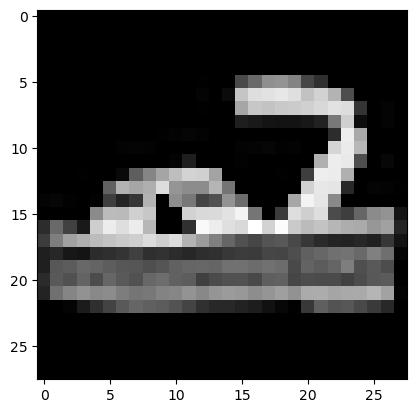

Prediction:  [9]
Label:  9


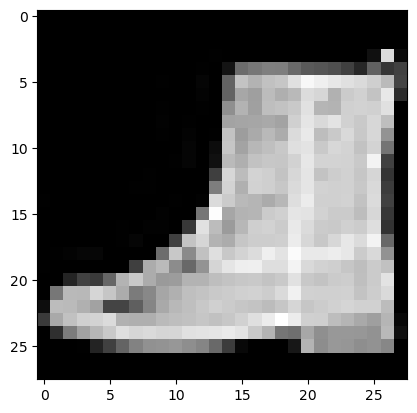

Prediction:  [6]
Label:  6


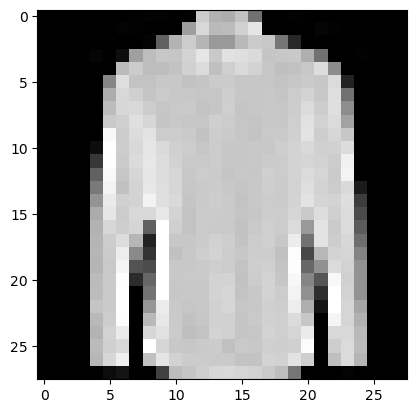

Prediction:  [9]
Label:  9


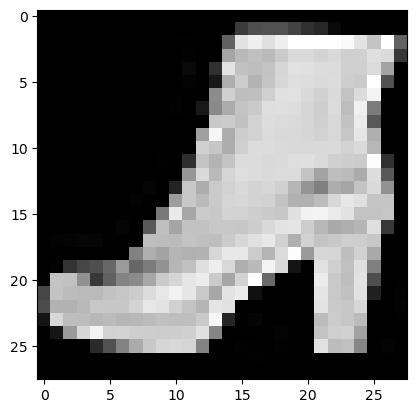

Prediction:  [6]
Label:  6


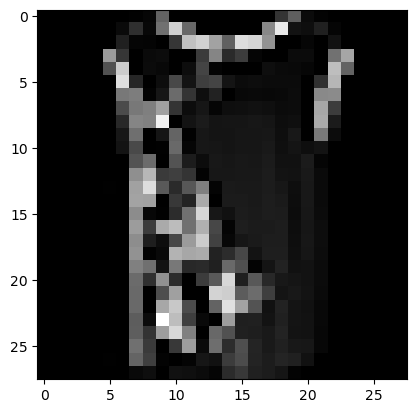

Prediction:  [3]
Label:  3


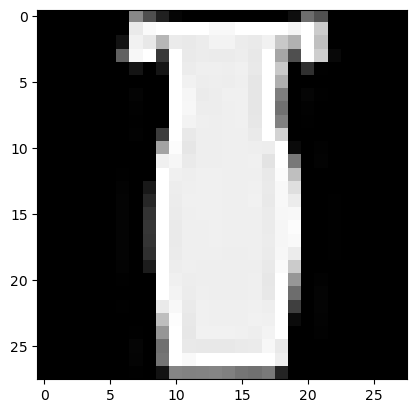

Prediction:  [7]
Label:  7


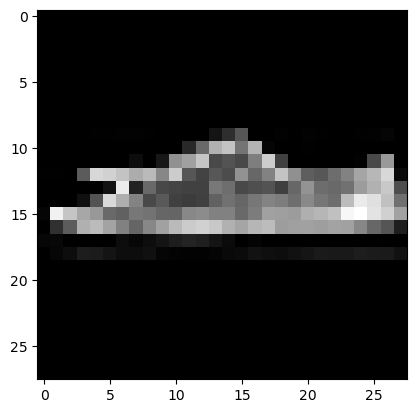

Prediction:  [7]
Label:  7


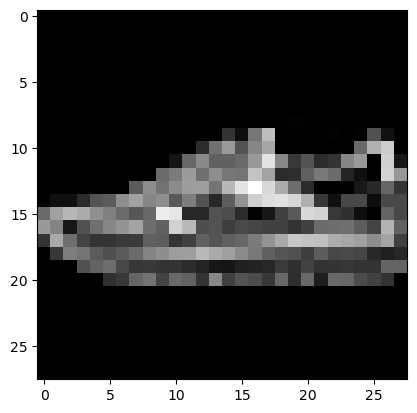

Prediction:  [5]
Label:  5


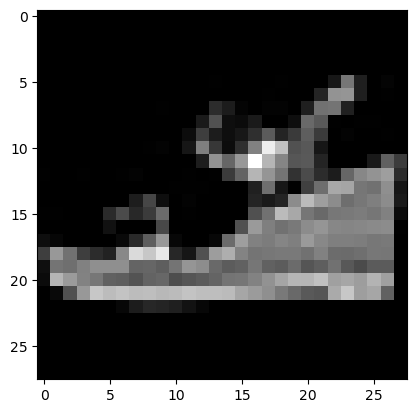

Prediction:  [0]
Label:  3


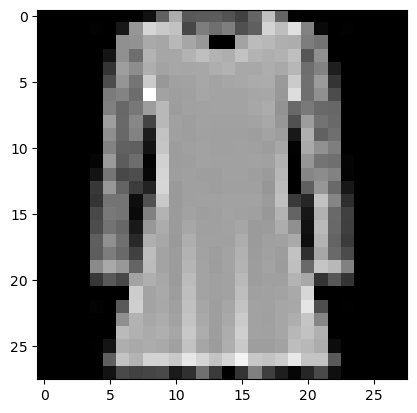

In [61]:
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)

In [24]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 0 6 0 5 2 6 4 9 0 1 4 3 8 4 2 0 6 8 0 1 5 4 0 2 3 2 8 3 5 5 8 0 2 1 9 6
 6 6 2 0 2 6 8 7 1 1 0 5 6 4 0 4 9 8 7 3 2 2 8 9 7 5 6 1 2 3 8 2 4 0 3 9 5
 2 7 3 4 3 1 1 7 5 1 5 7 8 9 8 8 8 2 6 0 6 4 3 9 9 3 2 7 1 1 7 5 8 9 2 7 4
 4 4 6 6 4 9 7 4 1 4 3 9 4 7 9 3 0 9 3 8 1 2 8 6 9 3 5 3 0 7 9 7 3 4 9 4 3
 0 4 0 3 2 7 8 2 4 1 3 7 1 3 7 5 3 1 1 1 4 6 7 2 4 1 6 8 4 1 4 7 0 5 1 1 5
 7 4 5 6 3 0 0 3 2 7 0 4 2 8 7 9 3 5 6 4 3 2 5 0 0 3 7 6 3 3 0 7 1 0 9 5 0
 5 7 2 0 7 2 6 5 4 5 4 7 4 9 3 2 8 7 5 8 9 3 0 2 2 7 2 6 9 0 7 5 2 8 1 0 1
 7 2 4 1 5 3 9 3 4 1 0 8 2 4 5 8 2 0 0 9 2 2 6 7 1 1 2 7 2 8 8 9 1 3 8 8 7
 9 4 0 8 8 9 2 0 5 7 8 9 4 8 2 5 0 6 5 9 5 4 2 3 6 6 5 3 8 9 8 6 6 7 0 2 8
 0 6 5 0 2 8 6 4 8 4 1 0 0 0 9 7 0 2 8 0 5 2 1 3 1 7 5 1 1 2 0 9 8 3 6 2 2
 2 9 3 7 1 7 7 2 9 0 3 0 8 7 7 4 9 2 3 1 8 4 7 0 8 9 7 6 9 6 3 1 1 2 2 1 2
 6 5 8 7 6 1 0 7 7 6 9 9 6 5 2 5 9 4 0 9 7 3 8 5 3 9 7 2 4 3 5 1 3 7 2 2 7
 1 0 0 8 1 4 8 3 5 3 7 7 8 9 1 2 9 5 0 9 1 1 4 4 8 0 2 5 2 1 6 2 6 9 3 7 3
 3 4 3 6 6 4 3 0 7 8 7 9 

0.792

Even on Dev set, it shows an accuracy of 80%, meaning the model is very well generalised.

In [58]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[0 1 0 ... 5 0 0] [0 1 2 ... 8 8 1]


C:\Users\User\AppData\Local\Temp\ipykernel_15656\3962810796.py:12: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\User\AppData\Local\Temp\ipykernel_15656\3962810796.py:12: RuntimeWarning: invalid value encountered in true_divide
  A = np.exp(Z) / sum(np.exp(Z))


0.3322

this error is the reason i split train into dev, rather than sticking to provided test set.